# Análisis de los resultados

Algunas preguntas surgen al realizar el estudio. Hasta el momento nos hemos preguntado:

1. ¿Cómo es el consumo de energía si se utiliza un termostato convencional?
2. ¿Cómo es el confort cuando se utiliza un termostato convencional?
3. ¿Cómo afecta la política al control de sombras convencional?
4. ¿Cómo sería el confort cuando no hay sistema de calefacción? ¿mejora con respecto al convencional?

Intentaremos responder a continuación a éstas con un análisis en profundidad de los datos.

## Importación de datos

Los archivos de datos utilizados para la evaluación del rendimiento de la política entrenada se generan a partir de los programas de evaluación que se introducen en los archivos `init_conventional.py` y `init_evaluation.py`. El primero aplica las políticas convencionales o basadas en reglas (RB) al caso evaluado, mientras que el segundo hace lo mismo pero aplicando la política entrenada con algoritmos de DRL.

Para responder a las preguntas realizadas, diferentes escenarios son evaluados (todos los escenarios se evaluan con un archivo climático distinto a los utilizados durante el entrenamiento):

1. ¿Cómo es el consumo de energía si se utiliza un termostato convencional?
    * Se plantea un escenario igual al entrenado, pero el termostato se modifica para calcular el requerimiento energético para un seteo de temperatura en vez de confort.
2. ¿Cómo es el confort cuando se utiliza un termostato convencional?
    * Al igual que en el punto anterior, se utiliza el mismo entorno para la evaluación, pero se modifica el flujo de EPRunner y EPEnv para poder incluir la métrica PPD, lo cual no se hizo durante el entrenamiento. Esto no afecta a la política entrenada previamente.
3. ¿Cómo afecta la política al control de sombras convencional?
    * Se continúa utilizando el mismo entorno de evaluación, pero ahora se centra la atención en la operación de las persianas, que se ven modificadas por la influencia del comportamiento del agente.
4. ¿Cómo sería el confort cuando no hay sistema de calefacción? ¿mejora con respecto al convencional?
    * Aquí se debe incluir un escenario en el que el sistema ideal de HVAC se encuentra no disponible, por lo que se evalúa el comportamiento natural del edificio.

### Escenario 1: Termostato convencional

Se evalúa un escenario con un equipo ideal de HVAC que utiliza un termostato basado en temperaturas de referencia. En nuestro caso, 19 °C como límite inferior y 24 °C como límite superior. Fuera de ese rango, la calefacción o refrigeración es necesaria.

Se comienza importando los datos del escenario a analizar:

In [3]:
# Import the necesaty libraries
import pandas as pd

# Replace 'ppo_file_path' and 'rb_file_path' with the actual paths to your CSV files
drl_file_path = "C:/Users/grhen/Documents/Resultados_RLforEP/natural_drl_control/natural_drl_control.csv"
rb_file_path = "C:/Users/grhen/Documents/Resultados_RLforEP/natural_rb_ventilation/natural_rb_ventilation.csv"

# Read CSV files into pandas DataFrames
drl_data = pd.read_csv(drl_file_path, header=None)
rb_data = pd.read_csv(rb_file_path, header=None)

# Function to clean and format the data
def clean_and_format(data: pd.DataFrame, multi_agent:bool=False):
    # Remove empty rows
    data = data.dropna(how='all')
    
    if not multi_agent:
        # Add the specified header
        header = ["To", "Ti", "v", "d", "RHo", "RHi", "dh", "dc", "window_shading_control_1","window_shading_control_2","opening_window_1",
                "opening_window_2", 'hora', 'simulation_day', "rad",
                
                "Dry Bulb Temperature day 1 hour 0","Relative Humidity day 1 hour 0","Wind Direction day 1 hour 0","Wind Speed day 1 hour 0","Total Sky day 1 hour 0","Liquid Precipitation Depth day 1 hour 0",
                "Dry Bulb Temperature day 1 hour 1","Relative Humidity day 1 hour 1","Wind Direction day 1 hour 1","Wind Speed day 1 hour 1","Total Sky day 1 hour 1","Liquid Precipitation Depth day 1 hour 1",
                "Dry Bulb Temperature day 1 hour 2","Relative Humidity day 1 hour 2","Wind Direction day 1 hour 2","Wind Speed day 1 hour 2","Total Sky day 1 hour 2","Liquid Precipitation Depth day 1 hour 2",
                "Dry Bulb Temperature day 1 hour 3","Relative Humidity day 1 hour 3","Wind Direction day 1 hour 3","Wind Speed day 1 hour 3","Total Sky day 1 hour 3","Liquid Precipitation Depth day 1 hour 3",
                "Dry Bulb Temperature day 1 hour 4","Relative Humidity day 1 hour 4","Wind Direction day 1 hour 4","Wind Speed day 1 hour 4","Total Sky day 1 hour 4","Liquid Precipitation Depth day 1 hour 4",
                "Dry Bulb Temperature day 1 hour 5","Relative Humidity day 1 hour 5","Wind Direction day 1 hour 5","Wind Speed day 1 hour 5","Total Sky day 1 hour 5","Liquid Precipitation Depth day 1 hour 5",
                "Dry Bulb Temperature day 1 hour 6","Relative Humidity day 1 hour 6","Wind Direction day 1 hour 6","Wind Speed day 1 hour 6","Total Sky day 1 hour 6","Liquid Precipitation Depth day 1 hour 6",
                "Dry Bulb Temperature day 1 hour 7","Relative Humidity day 1 hour 7","Wind Direction day 1 hour 7","Wind Speed day 1 hour 7","Total Sky day 1 hour 7","Liquid Precipitation Depth day 1 hour 7",
                "Dry Bulb Temperature day 1 hour 8","Relative Humidity day 1 hour 8","Wind Direction day 1 hour 8","Wind Speed day 1 hour 8","Total Sky day 1 hour 8","Liquid Precipitation Depth day 1 hour 8",
                "Dry Bulb Temperature day 1 hour 9","Relative Humidity day 1 hour 9","Wind Direction day 1 hour 9","Wind Speed day 1 hour 9","Total Sky day 1 hour 9","Liquid Precipitation Depth day 1 hour 9",
                "Dry Bulb Temperature day 1 hour 10","Relative Humidity day 1 hour 10","Wind Direction day 1 hour 10","Wind Speed day 1 hour 10","Total Sky day 1 hour 10","Liquid Precipitation Depth day 1 hour 10",
                "Dry Bulb Temperature day 1 hour 11","Relative Humidity day 1 hour 11","Wind Direction day 1 hour 11","Wind Speed day 1 hour 11","Total Sky day 1 hour 11","Liquid Precipitation Depth day 1 hour 11",
                "Dry Bulb Temperature day 1 hour 12","Relative Humidity day 1 hour 12","Wind Direction day 1 hour 12","Wind Speed day 1 hour 12","Total Sky day 1 hour 12","Liquid Precipitation Depth day 1 hour 12",
                "Dry Bulb Temperature day 1 hour 13","Relative Humidity day 1 hour 13","Wind Direction day 1 hour 13","Wind Speed day 1 hour 13","Total Sky day 1 hour 13","Liquid Precipitation Depth day 1 hour 13",
                "Dry Bulb Temperature day 1 hour 14","Relative Humidity day 1 hour 14","Wind Direction day 1 hour 14","Wind Speed day 1 hour 14","Total Sky day 1 hour 14","Liquid Precipitation Depth day 1 hour 14",
                "Dry Bulb Temperature day 1 hour 15","Relative Humidity day 1 hour 15","Wind Direction day 1 hour 15","Wind Speed day 1 hour 15","Total Sky day 1 hour 15","Liquid Precipitation Depth day 1 hour 15",
                "Dry Bulb Temperature day 1 hour 16","Relative Humidity day 1 hour 16","Wind Direction day 1 hour 16","Wind Speed day 1 hour 16","Total Sky day 1 hour 16","Liquid Precipitation Depth day 1 hour 16",
                "Dry Bulb Temperature day 1 hour 17","Relative Humidity day 1 hour 17","Wind Direction day 1 hour 17","Wind Speed day 1 hour 17","Total Sky day 1 hour 17","Liquid Precipitation Depth day 1 hour 17",
                "Dry Bulb Temperature day 1 hour 18","Relative Humidity day 1 hour 18","Wind Direction day 1 hour 18","Wind Speed day 1 hour 18","Total Sky day 1 hour 18","Liquid Precipitation Depth day 1 hour 18",
                "Dry Bulb Temperature day 1 hour 19","Relative Humidity day 1 hour 19","Wind Direction day 1 hour 19","Wind Speed day 1 hour 19","Total Sky day 1 hour 19","Liquid Precipitation Depth day 1 hour 19",
                "Dry Bulb Temperature day 1 hour 20","Relative Humidity day 1 hour 20","Wind Direction day 1 hour 20","Wind Speed day 1 hour 20","Total Sky day 1 hour 20","Liquid Precipitation Depth day 1 hour 20",
                "Dry Bulb Temperature day 1 hour 21","Relative Humidity day 1 hour 21","Wind Direction day 1 hour 21","Wind Speed day 1 hour 21","Total Sky day 1 hour 21","Liquid Precipitation Depth day 1 hour 21",
                "Dry Bulb Temperature day 1 hour 22","Relative Humidity day 1 hour 22","Wind Direction day 1 hour 22","Wind Speed day 1 hour 22","Total Sky day 1 hour 22","Liquid Precipitation Depth day 1 hour 22",
                "Dry Bulb Temperature day 1 hour 23","Relative Humidity day 1 hour 23","Wind Direction day 1 hour 23","Wind Speed day 1 hour 23","Total Sky day 1 hour 23","Liquid Precipitation Depth day 1 hour 23",
                
                "Dry Bulb Temperature day 2 hour 0","Relative Humidity day 2 hour 0","Wind Direction day 2 hour 0","Wind Speed day 2 hour 0","Total Sky day 2 hour 0","Liquid Precipitation Depth day 2 hour 0",
                "Dry Bulb Temperature day 2 hour 1","Relative Humidity day 2 hour 1","Wind Direction day 2 hour 1","Wind Speed day 2 hour 1","Total Sky day 2 hour 1","Liquid Precipitation Depth day 2 hour 1",
                "Dry Bulb Temperature day 2 hour 2","Relative Humidity day 2 hour 2","Wind Direction day 2 hour 2","Wind Speed day 2 hour 2","Total Sky day 2 hour 2","Liquid Precipitation Depth day 2 hour 2",
                "Dry Bulb Temperature day 2 hour 3","Relative Humidity day 2 hour 3","Wind Direction day 2 hour 3","Wind Speed day 2 hour 3","Total Sky day 2 hour 3","Liquid Precipitation Depth day 2 hour 3",
                "Dry Bulb Temperature day 2 hour 4","Relative Humidity day 2 hour 4","Wind Direction day 2 hour 4","Wind Speed day 2 hour 4","Total Sky day 2 hour 4","Liquid Precipitation Depth day 2 hour 4",
                "Dry Bulb Temperature day 2 hour 5","Relative Humidity day 2 hour 5","Wind Direction day 2 hour 5","Wind Speed day 2 hour 5","Total Sky day 2 hour 5","Liquid Precipitation Depth day 2 hour 5",
                "Dry Bulb Temperature day 2 hour 6","Relative Humidity day 2 hour 6","Wind Direction day 2 hour 6","Wind Speed day 2 hour 6","Total Sky day 2 hour 6","Liquid Precipitation Depth day 2 hour 6",
                "Dry Bulb Temperature day 2 hour 7","Relative Humidity day 2 hour 7","Wind Direction day 2 hour 7","Wind Speed day 2 hour 7","Total Sky day 2 hour 7","Liquid Precipitation Depth day 2 hour 7",
                "Dry Bulb Temperature day 2 hour 8","Relative Humidity day 2 hour 8","Wind Direction day 2 hour 8","Wind Speed day 2 hour 8","Total Sky day 2 hour 8","Liquid Precipitation Depth day 2 hour 8",
                "Dry Bulb Temperature day 2 hour 9","Relative Humidity day 2 hour 9","Wind Direction day 2 hour 9","Wind Speed day 2 hour 9","Total Sky day 2 hour 9","Liquid Precipitation Depth day 2 hour 9",
                "Dry Bulb Temperature day 2 hour 10","Relative Humidity day 2 hour 10","Wind Direction day 2 hour 10","Wind Speed day 2 hour 10","Total Sky day 2 hour 10","Liquid Precipitation Depth day 2 hour 10",
                "Dry Bulb Temperature day 2 hour 11","Relative Humidity day 2 hour 11","Wind Direction day 2 hour 11","Wind Speed day 2 hour 11","Total Sky day 2 hour 11","Liquid Precipitation Depth day 2 hour 11",
                "Dry Bulb Temperature day 2 hour 12","Relative Humidity day 2 hour 12","Wind Direction day 2 hour 12","Wind Speed day 2 hour 12","Total Sky day 2 hour 12","Liquid Precipitation Depth day 2 hour 12",
                "Dry Bulb Temperature day 2 hour 13","Relative Humidity day 2 hour 13","Wind Direction day 2 hour 13","Wind Speed day 2 hour 13","Total Sky day 2 hour 13","Liquid Precipitation Depth day 2 hour 13",
                "Dry Bulb Temperature day 2 hour 14","Relative Humidity day 2 hour 14","Wind Direction day 2 hour 14","Wind Speed day 2 hour 14","Total Sky day 2 hour 14","Liquid Precipitation Depth day 2 hour 14",
                "Dry Bulb Temperature day 2 hour 15","Relative Humidity day 2 hour 15","Wind Direction day 2 hour 15","Wind Speed day 2 hour 15","Total Sky day 2 hour 15","Liquid Precipitation Depth day 2 hour 15",
                "Dry Bulb Temperature day 2 hour 16","Relative Humidity day 2 hour 16","Wind Direction day 2 hour 16","Wind Speed day 2 hour 16","Total Sky day 2 hour 16","Liquid Precipitation Depth day 2 hour 16",
                "Dry Bulb Temperature day 2 hour 17","Relative Humidity day 2 hour 17","Wind Direction day 2 hour 17","Wind Speed day 2 hour 17","Total Sky day 2 hour 17","Liquid Precipitation Depth day 2 hour 17",
                "Dry Bulb Temperature day 2 hour 18","Relative Humidity day 2 hour 18","Wind Direction day 2 hour 18","Wind Speed day 2 hour 18","Total Sky day 2 hour 18","Liquid Precipitation Depth day 2 hour 18",
                "Dry Bulb Temperature day 2 hour 19","Relative Humidity day 2 hour 19","Wind Direction day 2 hour 19","Wind Speed day 2 hour 19","Total Sky day 2 hour 19","Liquid Precipitation Depth day 2 hour 19",
                "Dry Bulb Temperature day 2 hour 20","Relative Humidity day 2 hour 20","Wind Direction day 2 hour 20","Wind Speed day 2 hour 20","Total Sky day 2 hour 20","Liquid Precipitation Depth day 2 hour 20",
                "Dry Bulb Temperature day 2 hour 21","Relative Humidity day 2 hour 21","Wind Direction day 2 hour 21","Wind Speed day 2 hour 21","Total Sky day 2 hour 21","Liquid Precipitation Depth day 2 hour 21",
                "Dry Bulb Temperature day 2 hour 22","Relative Humidity day 2 hour 22","Wind Direction day 2 hour 22","Wind Speed day 2 hour 22","Total Sky day 2 hour 22","Liquid Precipitation Depth day 2 hour 22",
                "Dry Bulb Temperature day 2 hour 23","Relative Humidity day 2 hour 23","Wind Direction day 2 hour 23","Wind Speed day 2 hour 23","Total Sky day 2 hour 23","Liquid Precipitation Depth day 2 hour 23",
                
                "reward", "terminated", "truncated", 'Cooling energy', 'Heating energy', 'PPD', 'Ti']
    else:
            # Add the specified header
        header = ["agent_indicator", "To", "Ti", "v", "d", "RHo", "RHi", "dh", "dc", "window_shading_control_1","window_shading_control_2","opening_window_1",
                "opening_window_2", 'hora', 'simulation_day', "rad",
                
                "Dry Bulb Temperature day 1 hour 0","Relative Humidity day 1 hour 0","Wind Direction day 1 hour 0","Wind Speed day 1 hour 0","Total Sky day 1 hour 0","Liquid Precipitation Depth day 1 hour 0",
                "Dry Bulb Temperature day 1 hour 1","Relative Humidity day 1 hour 1","Wind Direction day 1 hour 1","Wind Speed day 1 hour 1","Total Sky day 1 hour 1","Liquid Precipitation Depth day 1 hour 1",
                "Dry Bulb Temperature day 1 hour 2","Relative Humidity day 1 hour 2","Wind Direction day 1 hour 2","Wind Speed day 1 hour 2","Total Sky day 1 hour 2","Liquid Precipitation Depth day 1 hour 2",
                "Dry Bulb Temperature day 1 hour 3","Relative Humidity day 1 hour 3","Wind Direction day 1 hour 3","Wind Speed day 1 hour 3","Total Sky day 1 hour 3","Liquid Precipitation Depth day 1 hour 3",
                "Dry Bulb Temperature day 1 hour 4","Relative Humidity day 1 hour 4","Wind Direction day 1 hour 4","Wind Speed day 1 hour 4","Total Sky day 1 hour 4","Liquid Precipitation Depth day 1 hour 4",
                "Dry Bulb Temperature day 1 hour 5","Relative Humidity day 1 hour 5","Wind Direction day 1 hour 5","Wind Speed day 1 hour 5","Total Sky day 1 hour 5","Liquid Precipitation Depth day 1 hour 5",
                "Dry Bulb Temperature day 1 hour 6","Relative Humidity day 1 hour 6","Wind Direction day 1 hour 6","Wind Speed day 1 hour 6","Total Sky day 1 hour 6","Liquid Precipitation Depth day 1 hour 6",
                "Dry Bulb Temperature day 1 hour 7","Relative Humidity day 1 hour 7","Wind Direction day 1 hour 7","Wind Speed day 1 hour 7","Total Sky day 1 hour 7","Liquid Precipitation Depth day 1 hour 7",
                "Dry Bulb Temperature day 1 hour 8","Relative Humidity day 1 hour 8","Wind Direction day 1 hour 8","Wind Speed day 1 hour 8","Total Sky day 1 hour 8","Liquid Precipitation Depth day 1 hour 8",
                "Dry Bulb Temperature day 1 hour 9","Relative Humidity day 1 hour 9","Wind Direction day 1 hour 9","Wind Speed day 1 hour 9","Total Sky day 1 hour 9","Liquid Precipitation Depth day 1 hour 9",
                "Dry Bulb Temperature day 1 hour 10","Relative Humidity day 1 hour 10","Wind Direction day 1 hour 10","Wind Speed day 1 hour 10","Total Sky day 1 hour 10","Liquid Precipitation Depth day 1 hour 10",
                "Dry Bulb Temperature day 1 hour 11","Relative Humidity day 1 hour 11","Wind Direction day 1 hour 11","Wind Speed day 1 hour 11","Total Sky day 1 hour 11","Liquid Precipitation Depth day 1 hour 11",
                "Dry Bulb Temperature day 1 hour 12","Relative Humidity day 1 hour 12","Wind Direction day 1 hour 12","Wind Speed day 1 hour 12","Total Sky day 1 hour 12","Liquid Precipitation Depth day 1 hour 12",
                "Dry Bulb Temperature day 1 hour 13","Relative Humidity day 1 hour 13","Wind Direction day 1 hour 13","Wind Speed day 1 hour 13","Total Sky day 1 hour 13","Liquid Precipitation Depth day 1 hour 13",
                "Dry Bulb Temperature day 1 hour 14","Relative Humidity day 1 hour 14","Wind Direction day 1 hour 14","Wind Speed day 1 hour 14","Total Sky day 1 hour 14","Liquid Precipitation Depth day 1 hour 14",
                "Dry Bulb Temperature day 1 hour 15","Relative Humidity day 1 hour 15","Wind Direction day 1 hour 15","Wind Speed day 1 hour 15","Total Sky day 1 hour 15","Liquid Precipitation Depth day 1 hour 15",
                "Dry Bulb Temperature day 1 hour 16","Relative Humidity day 1 hour 16","Wind Direction day 1 hour 16","Wind Speed day 1 hour 16","Total Sky day 1 hour 16","Liquid Precipitation Depth day 1 hour 16",
                "Dry Bulb Temperature day 1 hour 17","Relative Humidity day 1 hour 17","Wind Direction day 1 hour 17","Wind Speed day 1 hour 17","Total Sky day 1 hour 17","Liquid Precipitation Depth day 1 hour 17",
                "Dry Bulb Temperature day 1 hour 18","Relative Humidity day 1 hour 18","Wind Direction day 1 hour 18","Wind Speed day 1 hour 18","Total Sky day 1 hour 18","Liquid Precipitation Depth day 1 hour 18",
                "Dry Bulb Temperature day 1 hour 19","Relative Humidity day 1 hour 19","Wind Direction day 1 hour 19","Wind Speed day 1 hour 19","Total Sky day 1 hour 19","Liquid Precipitation Depth day 1 hour 19",
                "Dry Bulb Temperature day 1 hour 20","Relative Humidity day 1 hour 20","Wind Direction day 1 hour 20","Wind Speed day 1 hour 20","Total Sky day 1 hour 20","Liquid Precipitation Depth day 1 hour 20",
                "Dry Bulb Temperature day 1 hour 21","Relative Humidity day 1 hour 21","Wind Direction day 1 hour 21","Wind Speed day 1 hour 21","Total Sky day 1 hour 21","Liquid Precipitation Depth day 1 hour 21",
                "Dry Bulb Temperature day 1 hour 22","Relative Humidity day 1 hour 22","Wind Direction day 1 hour 22","Wind Speed day 1 hour 22","Total Sky day 1 hour 22","Liquid Precipitation Depth day 1 hour 22",
                "Dry Bulb Temperature day 1 hour 23","Relative Humidity day 1 hour 23","Wind Direction day 1 hour 23","Wind Speed day 1 hour 23","Total Sky day 1 hour 23","Liquid Precipitation Depth day 1 hour 23",
                
                "Dry Bulb Temperature day 2 hour 0","Relative Humidity day 2 hour 0","Wind Direction day 2 hour 0","Wind Speed day 2 hour 0","Total Sky day 2 hour 0","Liquid Precipitation Depth day 2 hour 0",
                "Dry Bulb Temperature day 2 hour 1","Relative Humidity day 2 hour 1","Wind Direction day 2 hour 1","Wind Speed day 2 hour 1","Total Sky day 2 hour 1","Liquid Precipitation Depth day 2 hour 1",
                "Dry Bulb Temperature day 2 hour 2","Relative Humidity day 2 hour 2","Wind Direction day 2 hour 2","Wind Speed day 2 hour 2","Total Sky day 2 hour 2","Liquid Precipitation Depth day 2 hour 2",
                "Dry Bulb Temperature day 2 hour 3","Relative Humidity day 2 hour 3","Wind Direction day 2 hour 3","Wind Speed day 2 hour 3","Total Sky day 2 hour 3","Liquid Precipitation Depth day 2 hour 3",
                "Dry Bulb Temperature day 2 hour 4","Relative Humidity day 2 hour 4","Wind Direction day 2 hour 4","Wind Speed day 2 hour 4","Total Sky day 2 hour 4","Liquid Precipitation Depth day 2 hour 4",
                "Dry Bulb Temperature day 2 hour 5","Relative Humidity day 2 hour 5","Wind Direction day 2 hour 5","Wind Speed day 2 hour 5","Total Sky day 2 hour 5","Liquid Precipitation Depth day 2 hour 5",
                "Dry Bulb Temperature day 2 hour 6","Relative Humidity day 2 hour 6","Wind Direction day 2 hour 6","Wind Speed day 2 hour 6","Total Sky day 2 hour 6","Liquid Precipitation Depth day 2 hour 6",
                "Dry Bulb Temperature day 2 hour 7","Relative Humidity day 2 hour 7","Wind Direction day 2 hour 7","Wind Speed day 2 hour 7","Total Sky day 2 hour 7","Liquid Precipitation Depth day 2 hour 7",
                "Dry Bulb Temperature day 2 hour 8","Relative Humidity day 2 hour 8","Wind Direction day 2 hour 8","Wind Speed day 2 hour 8","Total Sky day 2 hour 8","Liquid Precipitation Depth day 2 hour 8",
                "Dry Bulb Temperature day 2 hour 9","Relative Humidity day 2 hour 9","Wind Direction day 2 hour 9","Wind Speed day 2 hour 9","Total Sky day 2 hour 9","Liquid Precipitation Depth day 2 hour 9",
                "Dry Bulb Temperature day 2 hour 10","Relative Humidity day 2 hour 10","Wind Direction day 2 hour 10","Wind Speed day 2 hour 10","Total Sky day 2 hour 10","Liquid Precipitation Depth day 2 hour 10",
                "Dry Bulb Temperature day 2 hour 11","Relative Humidity day 2 hour 11","Wind Direction day 2 hour 11","Wind Speed day 2 hour 11","Total Sky day 2 hour 11","Liquid Precipitation Depth day 2 hour 11",
                "Dry Bulb Temperature day 2 hour 12","Relative Humidity day 2 hour 12","Wind Direction day 2 hour 12","Wind Speed day 2 hour 12","Total Sky day 2 hour 12","Liquid Precipitation Depth day 2 hour 12",
                "Dry Bulb Temperature day 2 hour 13","Relative Humidity day 2 hour 13","Wind Direction day 2 hour 13","Wind Speed day 2 hour 13","Total Sky day 2 hour 13","Liquid Precipitation Depth day 2 hour 13",
                "Dry Bulb Temperature day 2 hour 14","Relative Humidity day 2 hour 14","Wind Direction day 2 hour 14","Wind Speed day 2 hour 14","Total Sky day 2 hour 14","Liquid Precipitation Depth day 2 hour 14",
                "Dry Bulb Temperature day 2 hour 15","Relative Humidity day 2 hour 15","Wind Direction day 2 hour 15","Wind Speed day 2 hour 15","Total Sky day 2 hour 15","Liquid Precipitation Depth day 2 hour 15",
                "Dry Bulb Temperature day 2 hour 16","Relative Humidity day 2 hour 16","Wind Direction day 2 hour 16","Wind Speed day 2 hour 16","Total Sky day 2 hour 16","Liquid Precipitation Depth day 2 hour 16",
                "Dry Bulb Temperature day 2 hour 17","Relative Humidity day 2 hour 17","Wind Direction day 2 hour 17","Wind Speed day 2 hour 17","Total Sky day 2 hour 17","Liquid Precipitation Depth day 2 hour 17",
                "Dry Bulb Temperature day 2 hour 18","Relative Humidity day 2 hour 18","Wind Direction day 2 hour 18","Wind Speed day 2 hour 18","Total Sky day 2 hour 18","Liquid Precipitation Depth day 2 hour 18",
                "Dry Bulb Temperature day 2 hour 19","Relative Humidity day 2 hour 19","Wind Direction day 2 hour 19","Wind Speed day 2 hour 19","Total Sky day 2 hour 19","Liquid Precipitation Depth day 2 hour 19",
                "Dry Bulb Temperature day 2 hour 20","Relative Humidity day 2 hour 20","Wind Direction day 2 hour 20","Wind Speed day 2 hour 20","Total Sky day 2 hour 20","Liquid Precipitation Depth day 2 hour 20",
                "Dry Bulb Temperature day 2 hour 21","Relative Humidity day 2 hour 21","Wind Direction day 2 hour 21","Wind Speed day 2 hour 21","Total Sky day 2 hour 21","Liquid Precipitation Depth day 2 hour 21",
                "Dry Bulb Temperature day 2 hour 22","Relative Humidity day 2 hour 22","Wind Direction day 2 hour 22","Wind Speed day 2 hour 22","Total Sky day 2 hour 22","Liquid Precipitation Depth day 2 hour 22",
                "Dry Bulb Temperature day 2 hour 23","Relative Humidity day 2 hour 23","Wind Direction day 2 hour 23","Wind Speed day 2 hour 23","Total Sky day 2 hour 23","Liquid Precipitation Depth day 2 hour 23",
                
                'window_opening_1_action', 'window_opening_2_action', 'shading_control_1_action', 'shading_control_2_action',
                "reward", "terminated", "truncated", 'Cooling energy', 'Heating energy', 'PPD', 'Ti']
    data.columns = header

    return data

# Apply cleaning and formatting to both DataFrames
drl_data_cleaned = clean_and_format(drl_data, multi_agent=True)
rb_data_cleaned = clean_and_format(rb_data)

# Now 'ppo_data_cleaned' and 'rb_data_cleaned' contain the cleaned and formatted data


Se pueden analizar los resultados generales con el método `describe` de pandas para tipos `DataFrame`. Esto es útil para comprobar la correcta importación de los datos y algunos parámetros estadísticos generales de las diferentes variables.

In [4]:
# General results of the RB Policy
rb_data_cleaned.describe()

,To,Ti,v,d,RHo,RHi,dh,dc,window_shading_control_1,window_shading_control_2,...,Relative Humidity day 2 hour 23,Wind Direction day 2 hour 23,Wind Speed day 2 hour 23,Total Sky day 2 hour 23,Liquid Precipitation Depth day 2 hour 23,reward,Cooling energy,Heating energy,PPD,Ti
count,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.0,8759.0,8759.000000,8759.000000,...,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8.759000e+03,8759.0,8759.0,8759.000000,8759.000000
mean,15.700264,21.155712,4.277741,201.390303,54.463656,72.570372,0.0,0.0,0.775088,0.775088,...,59.872089,200.190743,3.753506,3.655193,0.034945,-1.178615e+01,0.0,0.0,53.135385,21.155614
std,7.843500,3.327946,2.309869,96.639621,18.648800,25.807431,0.0,0.0,0.417548,0.417548,...,15.486087,102.178788,2.194008,10.638525,0.339695,1.340899e+01,0.0,0.0,40.957164,3.327826
min,-4.316667,12.463536,0.100000,0.000000,16.000000,4.739518,0.0,0.0,0.000000,0.000000,...,8.750616,-47.002431,-0.771479,-34.804309,-0.797032,-1.712041e+02,0.0,0.0,5.000007,12.463536
25%,9.975000,18.489500,2.533333,153.000000,39.166667,48.540150,0.0,0.0,1.000000,1.000000,...,49.058125,144.530272,2.122189,-3.537711,-0.131602,-1.792895e+01,0.0,0.0,11.610592,18.489500
50%,15.800000,20.907567,3.966667,212.000000,54.000000,78.294489,0.0,0.0,1.000000,1.000000,...,59.165584,209.265847,3.438374,3.587942,0.010815,-7.134789e+00,0.0,0.0,39.285278,20.907567
75%,21.308333,23.521952,5.700000,262.166667,68.666667,99.823410,0.0,0.0,1.000000,1.000000,...,70.464291,273.134646,5.053646,10.941159,0.149830,-1.700428e+00,0.0,0.0,100.000000,23.521952
max,37.650000,35.084497,14.500000,359.833333,100.000000,100.000000,0.0,0.0,1.000000,1.000000,...,114.128081,411.253657,12.035815,48.030807,4.673275,-2.245149e-10,0.0,0.0,100.000000,35.084497


In [5]:
# General results of the DRL Policy
drl_data_cleaned.describe()

,agent_indicator,To,Ti,v,d,RHo,RHi,dh,dc,window_shading_control_1,...,Liquid Precipitation Depth day 2 hour 23,window_opening_1_action,window_opening_2_action,shading_control_1_action,shading_control_2_action,reward,Cooling energy,Heating energy,PPD,Ti
count,52559.0,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.0,52559.0,52559.0,...,52559.000000,52559.0,52559.0,52559.0,52559.0,5.255900e+04,52559.0,52559.0,52559.000000,52559.000000
mean,3.0,15.700712,21.408752,4.277572,200.928927,54.465087,96.291202,0.0,0.0,0.0,...,0.036685,0.0,0.0,0.0,0.0,-1.022164e+01,0.0,0.0,51.622106,21.408726
std,0.0,7.840637,3.142039,2.306558,96.529641,18.629551,7.837368,0.0,0.0,0.0,...,0.338929,0.0,0.0,0.0,0.0,1.352030e+01,0.0,0.0,41.837159,3.142009
min,3.0,-4.400000,14.645557,0.100000,0.000000,16.000000,43.504289,0.0,0.0,0.0,...,-0.870022,0.0,0.0,0.0,0.0,-1.340237e+02,0.0,0.0,5.000000,14.645557
25%,3.0,9.933333,18.909414,2.533333,151.000000,39.000000,97.174076,0.0,0.0,0.0,...,-0.128038,0.0,0.0,0.0,0.0,-1.456869e+01,0.0,0.0,9.457634,18.909414
50%,3.0,15.800000,21.583889,4.000000,211.833333,54.000000,100.000000,0.0,0.0,0.0,...,0.008866,0.0,0.0,0.0,0.0,-5.032916e+00,0.0,0.0,34.505732,21.583889
75%,3.0,21.300000,23.524838,5.700000,262.000000,68.666667,100.000000,0.0,0.0,0.0,...,0.149213,0.0,0.0,0.0,0.0,-1.057137e+00,0.0,0.0,99.999336,23.524838
max,3.0,37.700000,33.576861,14.800000,359.833333,100.000000,100.000000,0.0,0.0,0.0,...,4.898124,0.0,0.0,0.0,0.0,-8.076162e-09,0.0,0.0,100.000000,33.576861


Comenzamos respondiendo a la primera pregunta:

1. ¿Cómo es el consumo de energía si se utiliza un termostato convencional?

Para ello elaboramos una gráfica donde se pueda ver el consumo de energía anual para cada política (RB y DRL).

In [6]:
import matplotlib.pyplot as plt

In [ ]:
# Calculate total energy and comfort for each DataFrame
drl_total_energy = drl_data_cleaned['energy'].sum()
rb_total_energy = rb_data_cleaned['energy'].sum()

# Create a bar graph
categories = ['DRL Energy', 'RB Energy']
values = [drl_total_energy, rb_total_energy]

plt.bar_label(plt.bar(categories, values, color=['blue', 'red']))
plt.ylabel('Energy, kWh')
plt.title('Total amount of energy for different policies')
plt.show()

También se puede calcular el ahorro de energía de forma porcentual:

In [31]:
drl_energy_rate_savings = (drl_total_energy-rb_total_energy)/rb_total_energy
print('The Energy Saving Rate compared to RB of DRL Policy is: ' + str(round(-drl_energy_rate_savings*100, 2))+'%\n')

The Energy Saving Rate compared to RB of DRL Policy is: 5.36%



Seguimos avanzando el la respuesta a preguntas.

2. ¿Cómo es el confort cuando se utiliza un termostato convencional?

Al igual que en el punto anterior, se utiliza el mismo entorno para la evaluación, pero se modifica el flujo de EPRunner y EPEnv para poder incluir la métrica PPD, lo cual no se hizo durante el entrenamiento. Esto no afecta a la política entrenada previamente.

Para responder la siguiente pregunta:

3. ¿Cómo afecta la política al control de sombras convencional?

se continúa utilizando el mismo entorno de evaluación, pero ahora se centra la atención en la operación de las persianas, que se ven modificadas por la influencia del comportamiento del agente.

Surge aquí una pregunta adicional ¿cómo es la política entrenada para conseguir estos ahorros de energía?

Comenzamos por analizar el tiempo de apertura de ambas ventanas durante el año.

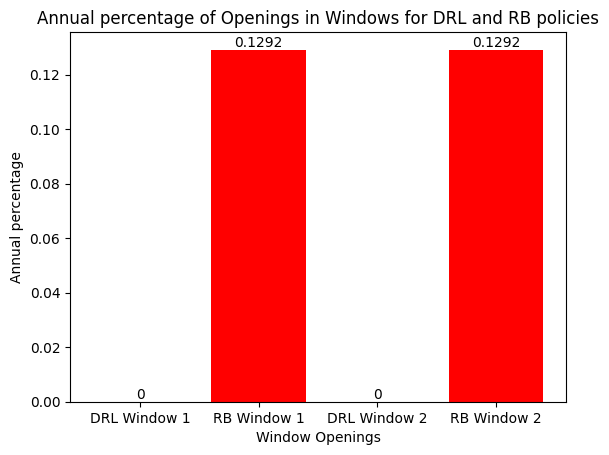

In [7]:
metrics = [
    round(drl_data_cleaned.describe()['opening_window_1']['mean'],4),
    round(drl_data_cleaned.describe()['opening_window_2']['mean'],4),
    round(rb_data_cleaned.describe()['opening_window_1']['mean'],4),
    round(rb_data_cleaned.describe()['opening_window_2']['mean'],4)
]

# Create a bar graph
categories = ['DRL Window 1', 'RB Window 1', 'DRL Window 2', 'RB Window 2']
values = [metrics[0], metrics[2], metrics[1], metrics[3]]

plt.bar_label(plt.bar(categories, values, color=['blue', 'red', 'blue', 'red']))
plt.xlabel('Window Openings')
plt.ylabel('Annual percentage')
plt.title('Annual percentage of Openings in Windows for DRL and RB policies')
plt.show()

Esbozamos esta misma gráfica, pero ahora para el control de sombras en las ventanas.

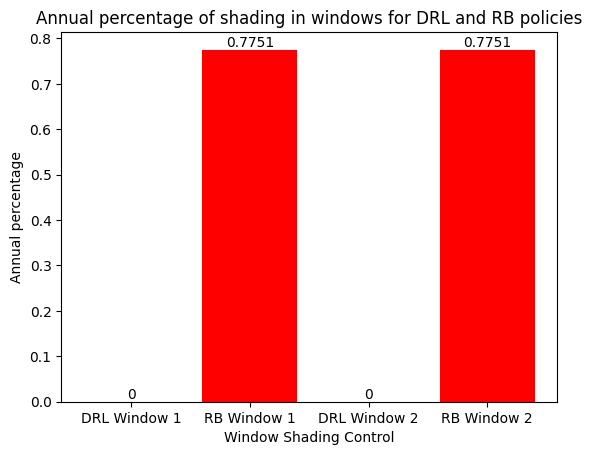

In [8]:
metrics = [
    round(drl_data_cleaned.describe()['window_shading_control_1']['mean'],4),
    round(drl_data_cleaned.describe()['window_shading_control_2']['mean'],4),
    round(rb_data_cleaned.describe()['window_shading_control_1']['mean'],4),
    round(rb_data_cleaned.describe()['window_shading_control_2']['mean'],4)
]

# Create a bar graph
categories = ['DRL Window 1', 'RB Window 1', 'DRL Window 2', 'RB Window 2']
values = [metrics[0], metrics[2], metrics[1], metrics[3]]

plt.bar_label(plt.bar(categories, values, color=['blue', 'red', 'blue', 'red']))
plt.xlabel('Window Shading Control')
plt.ylabel('Annual percentage')
plt.title('Annual percentage of shading in windows for DRL and RB policies')
plt.show()

Es importante tener en cuenta que aquí la política utilizada para operar las sombras siempre fue la convencional, por lo que las modificaciones presentadas responden a la modificación introducida en el entorno y no a un aprendizaje de política para estos dispositivos. Como acción futura se quiere optimizar la política para el control de sombras.

Analicemos cómo es la operación temporal de las ventanas. Para ello, es mejor utilizar gráficas de línea.

In [9]:
def policy_analisys(drl_data_cleaned, rb_data_cleaned, a:int=None, b:int=None, To: bool = True):
    
    if a == None and b == None:
        drl_filtered_data=drl_data_cleaned.iloc[:]
        rb_filtered_data=rb_data_cleaned.iloc[:]
    elif a == None and b != None:
        drl_filtered_data=drl_data_cleaned.iloc[:b]
        rb_filtered_data=rb_data_cleaned.iloc[:b]
    elif a != None and b == None:
        drl_filtered_data=drl_data_cleaned.iloc[a:]
        rb_filtered_data=rb_data_cleaned.iloc[a:]
    elif a != None and b != None:
        drl_filtered_data=drl_data_cleaned.iloc[a:b]
        rb_filtered_data=rb_data_cleaned.iloc[a:b]
    
    
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Time Steps')

    ax1.set_ylabel('Opening state / Normalice Energy, kWh/kWh_max')
    ax1.plot(rb_filtered_data['opening_window_1'], label='RB Window 1 opening', color='C0')
    ax1.plot(drl_filtered_data['opening_window_1'], label='DRL Window 1 opening', color='C1')
    #ax1.plot(drl_filtered_data['energy']/max([max(drl_filtered_data['energy']), max(rb_filtered_data['energy'])]), label='DRL energy requirement', color='C2')
    #ax1.plot(rb_filtered_data['energy']/max([max(drl_filtered_data['energy']), max(rb_filtered_data['energy'])]), label='RB energy requirement', color='C3')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Temperature, °C')
    ax2.plot(rb_filtered_data['Ti'], label='Zone Mean Temperature RB', color='C4')
    ax2.plot(drl_filtered_data['Ti'], label='Zone Mean Temperature DRL', color='C5')
    if To:
        ax2.plot(drl_filtered_data['To'], label='Site Temperature', color='C6')


    plt.title(f'Comparison of opening in the Window 1 between DRL and RB policies')
    fig.legend(bbox_to_anchor=(1., 0., 0.45, 1.))
    fig.tight_layout() 

    # Display the plot
    plt.show()
    
    #print(f"El consumo total de energía para el periodo elegido por la política convencional es de {round(sum(rb_filtered_data['energy']),2)}, \nmientras que para la política propuesta o DRL es de {round(sum(drl_filtered_data['energy']),2)}.")
    

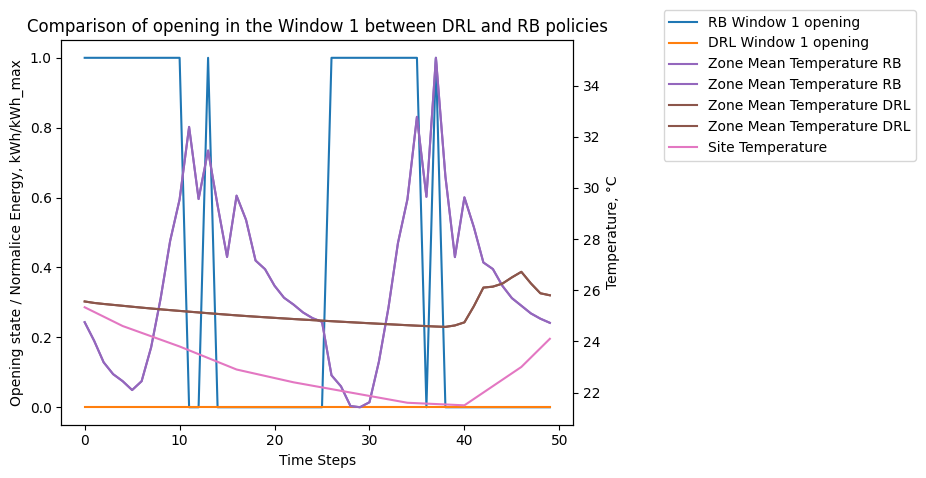

In [10]:
a = 0
b = 50

policy_analisys(drl_data_cleaned, rb_data_cleaned, a, b, To=True)

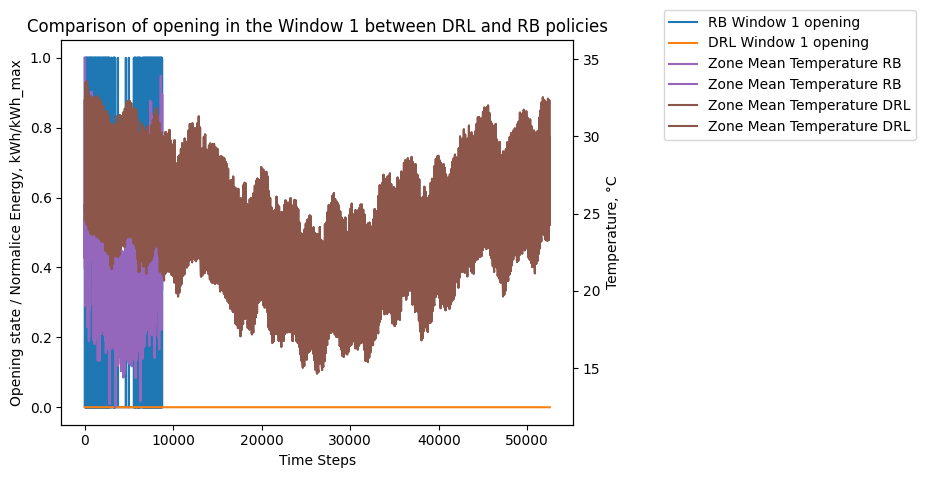

In [11]:
a = None
b = None

policy_analisys(drl_data_cleaned, rb_data_cleaned, a, b, To= False)

Analizaremos cómo es el comportamiento de la temperatura interior para diferentes temeperaturas exteriores según la política seguida.

In [ ]:
import seaborn as sns

sns.regplot(x='To', y='Ti', data=drl_data_cleaned, marker='x', color='blue', label='DRL Policy')
sns.regplot(x='To', y='Ti', data=rb_data_cleaned, marker='x', color='red', label='RB Policy')
plt.xlabel('Exterior temperature, °C')
plt.ylabel('Interior temperature, °C')
plt.title('Gráfico de dispersión con regresión lineal')
plt.grid(True)
plt.legend(bbox_to_anchor=(1., 0., 0.45, 1.))
plt.show()

Por último.

4. ¿Cómo sería el confort cuando no hay sistema de calefacción? ¿mejora con respecto al convencional?

Aquí se debe incluir un escenario en el que el sistema ideal de HVAC se encuentra no disponible, por lo que se evalúa el comportamiento natural del edificio.

In [ ]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Solar radiation, W/m2')
ax1.plot(rb_data_cleaned['rad'], label='Site Solar Radiation', color='orange')

ax2 = ax1.twinx()
ax2.set_ylabel('Temperature, °C')
ax2.plot(rb_data_cleaned['Ti'], label='Zone Mean Temperature RB', color='black')
ax2.plot(drl_data_cleaned['Ti'], label='Zone Mean Temperature DRL', color='green')
ax2.plot(drl_data_cleaned['To'], label='Site Temperature', color='yellow')


plt.title(f'Comparison of {column_name} between DRL and RB policies')
fig.legend()
fig.tight_layout() 

# Display the plot
plt.show()

In [4]:
def line_plot(
    drl_data_cleaned: pd.DataFrame,
    rb_data_cleaned: pd.DataFrame,
    column_name:str
    ):
    """Plot a line chart

    Args:
        ppo_data_cleaned (pd.DataFrame): The metrics of the DRL Policy to be ploted.
        rb_data_cleaned (pd.DataFrame): The metrics of the RB Policy to be ploted.
        column_name (str): The ID name of the column in the DataFrames evaluated.
    """
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Time Steps')
    ax1.set_ylabel(column_name)
    ax1.plot(drl_data_cleaned[column_name], label=column_name+' DRL', color='red')
    ax1.plot(rb_data_cleaned[column_name], label=column_name+' RB', color='blue')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Zone Mean Temperature, °C')
    ax2.plot(drl_data_cleaned['Ti'], label='Ti DRL', color='green')
    ax2.plot(rb_data_cleaned['Ti'], label='Ti RB', color='black')
    ax2.plot(drl_data_cleaned['To'], label='Site Temperature', color='yellow')
    
    #ax3 = ax1.twinx()
    #ax3.set_ylabel('Site Radiation, W/m2')
    #ax3.plot(rb_data_cleaned['rad'], label='Site Radiation', color='orange')

    plt.title(f'Comparison of {column_name} between DRL and RB policies')
    fig.legend()
    fig.tight_layout() 

    # Display the plot
    plt.show()


# Replica de imágenes de artículo Vicky Mercado

Se intenta aquí obtener el mismo tipo de gráficas que en el artículo de Vicky Mercado para poder analizar las ventajas de la ventilación con DRL en comparación con la estrategia de ventilación nocturna (convencional).

In [30]:
def ti_hist(
    non_venting_ti_data,
    drl_venting_ti_data,
    n_bins:int=14
):
    """Histograma de tempertauras interiores
    """
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

    # We can set the number of bins with the *bins* keyword argument.
    axs[0].hist(non_venting_ti_data, bins=n_bins)
    axs[1].hist(drl_venting_ti_data, bins=n_bins)
    axs.set_title('Histograma de temperaturas interiores')
    axs.set_ylabel('Frecuencia')
    axs.set_xlabel('Temperatura interior, °C')

    plt.legend()
    plt.plot()

In [ ]:
ti_hist(rb_data_cleaned['Ti'],drl_data_cleaned['Ti'])

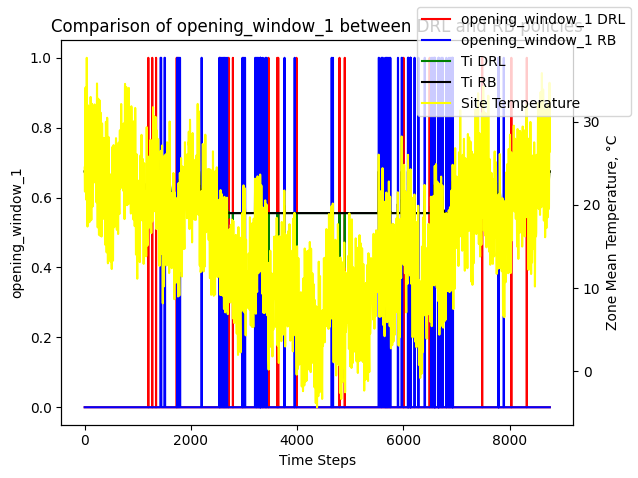

In [5]:
# Replace 'column_name' with the name of the column you want to plot
column_name = 'opening_window_1'

line_plot(
    drl_data_cleaned=drl_data_cleaned,
    rb_data_cleaned=rb_data_cleaned,
    column_name=column_name
    )

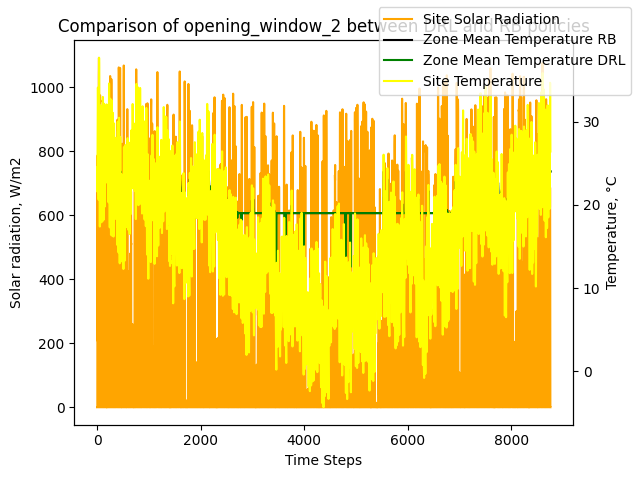

In [13]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Solar radiation, W/m2')
ax1.plot(rb_data_cleaned['rad'], label='Site Solar Radiation', color='orange')

ax2 = ax1.twinx()
ax2.set_ylabel('Temperature, °C')
ax2.plot(rb_data_cleaned['Ti'], label='Zone Mean Temperature RB', color='black')
ax2.plot(drl_data_cleaned['Ti'], label='Zone Mean Temperature DRL', color='green')
ax2.plot(drl_data_cleaned['To'], label='Site Temperature', color='yellow')


plt.title(f'Comparison of {column_name} between DRL and RB policies')
fig.legend()
fig.tight_layout() 

# Display the plot
plt.show()

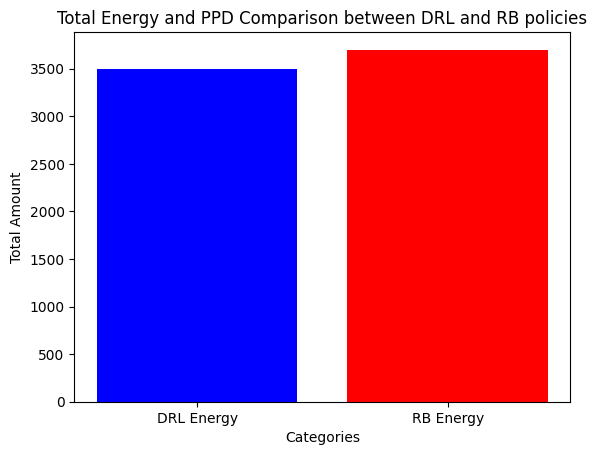

In [7]:
# Define the columns representing 'energy' and 'comfort'
energy_column = 'energy'

# Calculate total energy and comfort for each DataFrame
drl_total_energy = drl_data_cleaned[energy_column].sum()

rb_total_energy = rb_data_cleaned[energy_column].sum()

# Create a bar graph
categories = ['DRL Energy', 'RB Energy']
values = [drl_total_energy, rb_total_energy]

plt.bar(categories, values, color=['blue', 'red'])
plt.xlabel('Categories')
plt.ylabel('Total Amount')
plt.title('Total Energy and PPD Comparison between DRL and RB policies')
plt.show()

In [ ]:
# Define the columns representing 'energy' and 'comfort'
ppd_column = 'ppd'

# Calculate total energy and comfort for each DataFrame
drl_total_ppd = drl_data_cleaned[ppd_column].mean()/100

rb_total_ppd = rb_data_cleaned[ppd_column].mean()/100

# Create a bar graph
categories = ['DRL PPD', 'RB PPD']
values = [drl_total_ppd, rb_total_ppd]

plt.bar(categories, values, color=['blue', 'red'])
plt.xlabel('Categories')
plt.ylabel('Total Amount')
plt.title('Total Energy and PPD Comparison between DRL and RB policies')
plt.show()

In [9]:
drl_energy_rate_increment = (drl_total_energy-rb_total_energy)/rb_total_energy
#drl_comfort_rate_increment = (drl_total_ppd-rb_total_ppd)/rb_total_ppd

print('The Energy Rate Increment of DRL Policy is: ' + str(round(drl_energy_rate_increment*100, 2))+'%\n')
#print('The PPD Rate Increment of DRL Policy is: ' + str(round(drl_comfort_rate_increment*100, 2))+'%')

The Energy Rate Increment of DRL Policy is: -5.36%



## Análisis de políticas

En este apartado analizaremos las políticas seguidas por el agente DRL y las compararemos con las del RB.
Para ello, caracterizaremos algunas métricas generales que contemplen el año entero y luego nos enfocaremos en el estudio de algunas semanas características para observar el comportamiento de cada política.

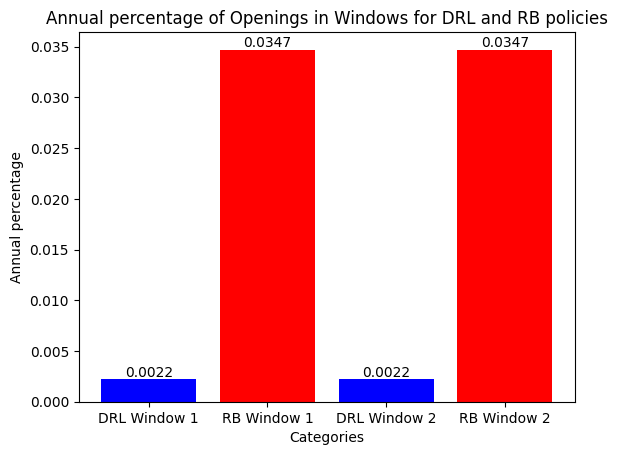

In [10]:
# Define the columns representing 'energy' and 'comfort'
metrics = [
    round(drl_data_cleaned.describe()['opening_window_1']['mean'],4),
    round(drl_data_cleaned.describe()['opening_window_2']['mean'],4),
    round(rb_data_cleaned.describe()['opening_window_1']['mean'],4),
    round(rb_data_cleaned.describe()['opening_window_2']['mean'],4)
]

# Create a bar graph
categories = ['DRL Window 1', 'RB Window 1', 'DRL Window 2', 'RB Window 2']
values = [metrics[0], metrics[2], metrics[1], metrics[3]]

plt.bar_label(plt.bar(categories, values, color=['blue', 'red', 'blue', 'red']))
plt.xlabel('Categories')
plt.ylabel('Annual percentage')
plt.title('Annual percentage of Openings in Windows for DRL and RB policies')
plt.show()

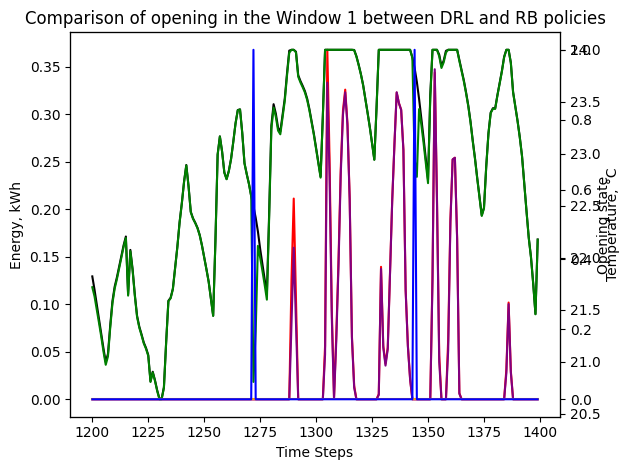

In [22]:

drl_filtered_data=drl_data_cleaned.iloc[1200:1400]
rb_filtered_data=rb_data_cleaned.iloc[1200:1400]

fig, ax1 = plt.subplots()
ax1.set_xlabel('Time Steps')

ax1.set_ylabel('Energy, kWh')
ax1.plot(rb_filtered_data['energy'], label='Energy demanded by RB', color='red')
ax1.plot(drl_filtered_data['energy'], label='Energy demanded by DRL', color='purple')

ax2 = ax1.twinx()
ax2.set_ylabel('Temperature, °C')
ax2.plot(rb_filtered_data['Ti'], label='Zone Mean Temperature RB', color='black')
ax2.plot(drl_filtered_data['Ti'], label='Zone Mean Temperature DRL', color='green')
#ax2.plot(drl_filtered_data['To'], label='Site Temperature', color='yellow')

ax3 = ax1.twinx()
ax3.set_ylabel('Opening state')
ax3.plot(rb_filtered_data['opening_window_1'], label='RB Window 1 opening', color='orange')
ax3.plot(drl_filtered_data['opening_window_1'], label='DRL Window 1 opening', color='blue')

plt.title(f'Comparison of opening in the Window 1 between DRL and RB policies')
#fig.legend()
fig.tight_layout() 

# Display the plot
plt.show()

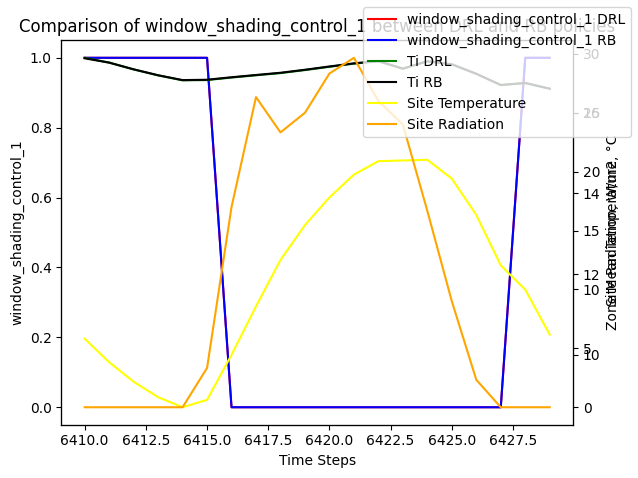

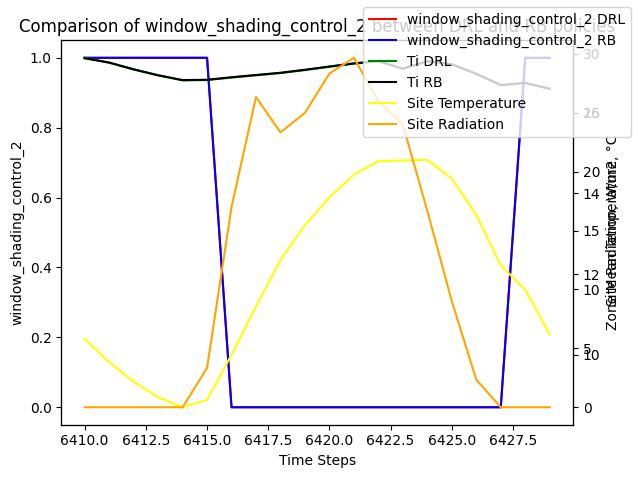

In [81]:
# Replace 'column_name' with the name of the column you want to plot
column_name = 'window_shading_control_1'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[6410:6430],
    rb_data_cleaned=rb_data_cleaned.iloc[6410:6430],
    column_name=column_name
    )

# Replace 'column_name' with the name of the column you want to plot
column_name = 'window_shading_control_2'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[6410:6430],
    rb_data_cleaned=rb_data_cleaned.iloc[6410:6430],
    column_name=column_name
    )